In [35]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# load in datasets

imdb_data = pd.read_csv('movie_metadata.csv')

# figure out how many missing values are in our two main predictors
print(imdb_data['budget'].isna().sum())
print(imdb_data['gross'].isna().sum())

492
884


In [109]:
# Dropping data that is missing 'budget' or 'gross variable'
imdb_dropped = imdb_data.dropna(subset=['gross','budget'])
imdb_dropped.reset_index(inplace=True)
imdb_dropped.drop(columns='index', inplace=True)

# Filter out foreign films
us_films = imdb_dropped.loc[imdb_dropped['country']=='USA']

# Splitting data into training and test

np.random.seed(2)
train = us_films.sample(round(us_films.shape[0]*0.8)) # 80% training, 20% test
test = us_films.drop(train.index)

/var/folders/p0/ppz0yj5s4qz65pfjbd7vtldh0000gn/T/ipykernel_14046/1987566043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_dropped.drop(columns='index', inplace=True)


In [105]:
us_films.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [110]:
train.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.284774,0.186296,0.294989,0.167418,0.498725,0.594142,0.251614,-0.022960,0.581042,0.510194,0.404761,0.286539,0.354853,0.175454,0.711925
duration,0.284774,1.000000,0.221416,0.142724,0.093861,0.297866,0.393299,0.136254,0.006080,0.387616,0.321923,-0.099729,0.149184,0.392004,0.161018,0.258511
director_facebook_likes,0.186296,0.221416,1.000000,0.135476,0.091296,0.152604,0.329289,0.125651,-0.048802,0.246241,0.097170,-0.064807,0.129174,0.236808,0.043439,0.183049
actor_3_facebook_likes,0.294989,0.142724,0.135476,1.000000,0.243430,0.279459,0.279208,0.473513,0.112952,0.213823,0.271257,0.136344,0.543155,0.090836,0.047932,0.319172
actor_1_facebook_likes,0.167418,0.093861,0.091296,0.243430,1.000000,0.120184,0.167551,0.947885,0.054490,0.115628,0.132498,0.086278,0.369456,0.114872,0.045510,0.121181
gross,0.498725,0.297866,0.152604,0.279459,0.120184,1.000000,0.628201,0.207896,-0.041113,0.554445,0.641651,0.053946,0.240613,0.271173,0.063259,0.398207
num_voted_users,0.594142,0.393299,0.329289,0.279208,0.167551,0.628201,1.000000,0.241332,-0.043001,0.790963,0.404285,0.019318,0.251608,0.515947,0.088813,0.525368
cast_total_facebook_likes,0.251614,0.136254,0.125651,0.473513,0.947885,0.207896,0.241332,1.000000,0.077191,0.177211,0.215788,0.122772,0.619123,0.134940,0.061334,0.208008
facenumber_in_poster,-0.022960,0.006080,-0.048802,0.112952,0.054490,-0.041113,-0.043001,0.077191,1.000000,-0.089785,-0.028108,0.094442,0.065540,-0.073270,0.013902,0.011411
num_user_for_reviews,0.581042,0.387616,0.246241,0.213823,0.115628,0.554445,0.790963,0.177211,-0.089785,1.000000,0.414814,0.022925,0.199183,0.362578,0.090947,0.409535


In [114]:
ols_object = smf.ols(formula = 'gross~budget+actor_1_facebook_likes*director_facebook_likes*actor_2_facebook_likes+duration+title_year+duration', data=train)
model = ols_object.fit()


# returning numerical/statistical analysis
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     196.7
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          1.39e-304
Time:                        15:45:44   Log-Likelihood:                -47284.
No. Observations:                2458   AIC:                         9.459e+04
Df Residuals:                    2447   BIC:                         9.465e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [116]:
#Computing RMSE on test data
pred_gross = model.predict(test)
np.sqrt(((test.gross - pred_gross)**2).mean())

51257287.118468806

In [113]:
us_films.gross.mean()

57289447.44697463

<AxesSubplot:xlabel='budget', ylabel='gross'>

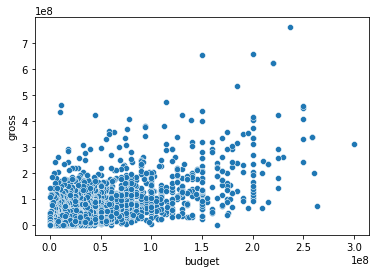

In [94]:
sns.scatterplot(data=us_films, x='budget',  y='gross')